In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
df['house_val'] = dataset.target

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
house_val     20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_val
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

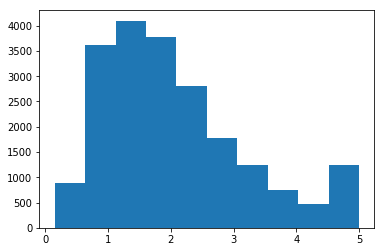

In [7]:
plt.hist(df['house_val'])

In [8]:
bins = [0, 1.2,1.8,2.6,10]
labels = [1, 2, 3, 4]

In [9]:
df['bin_house_val'] = pd.cut(df['house_val'],bins,labels=labels)

In [10]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_val,bin_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,4
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,4
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,3
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,3
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,4


/anaconda3/envs/base_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/base_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

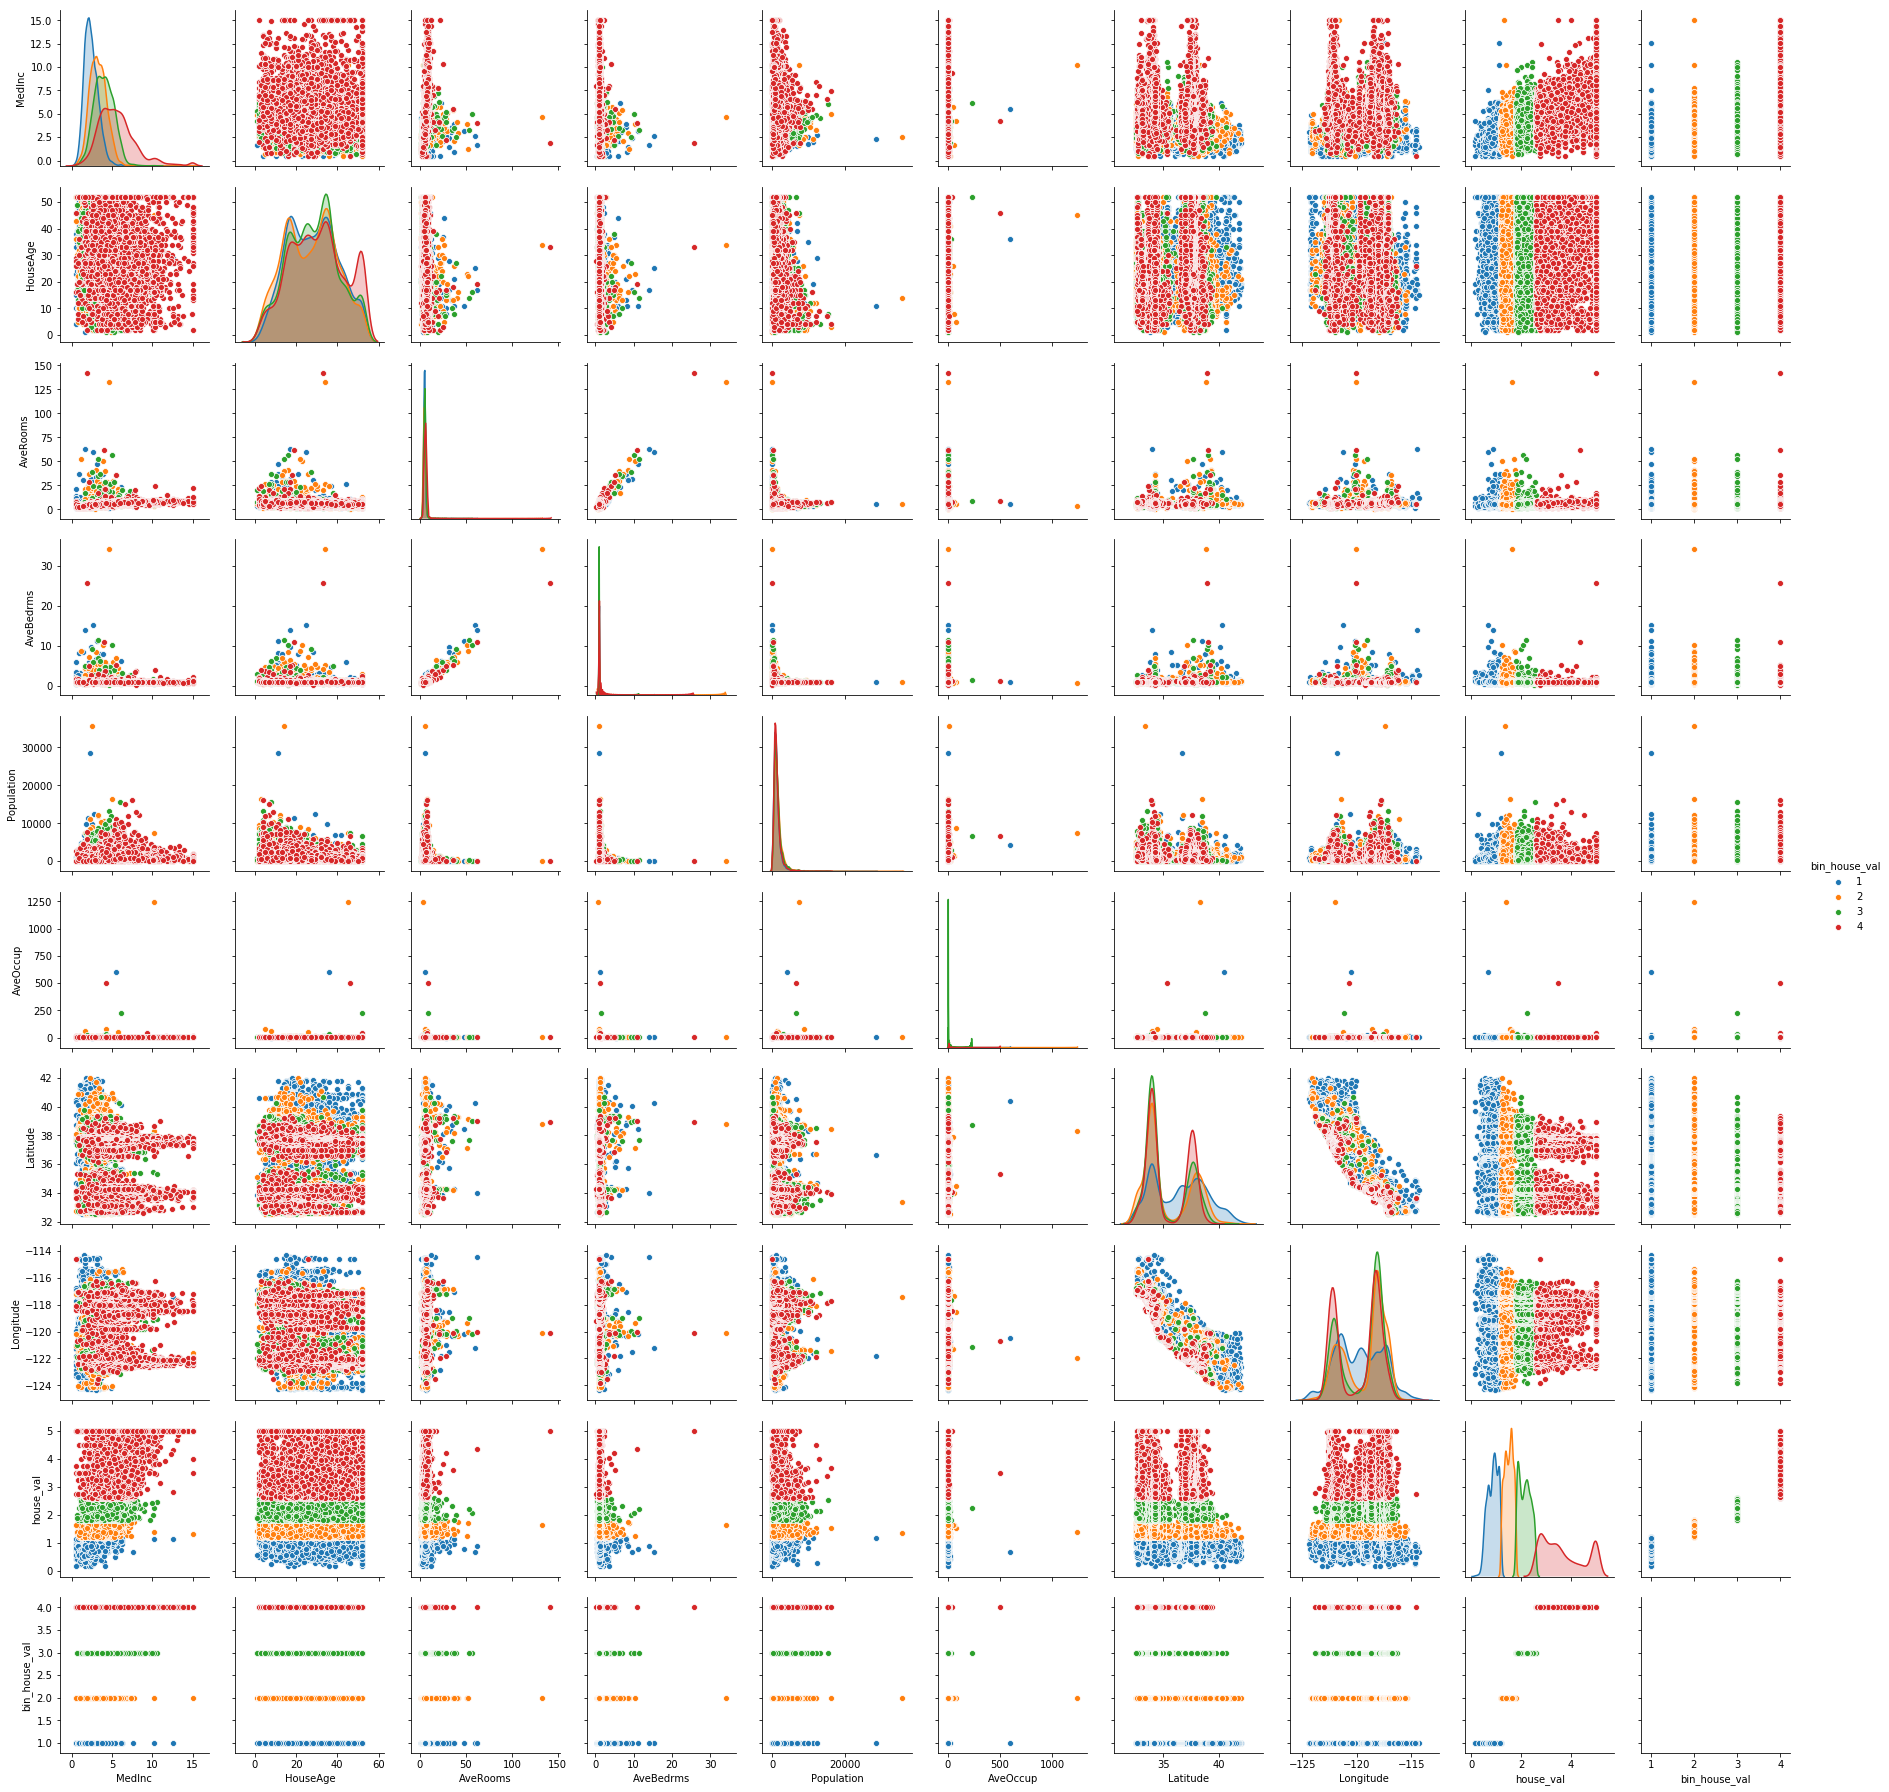

In [16]:
sns.pairplot(df, hue='bin_house_val')

In [13]:
# from plot above it seems reasonable to separate median value low (Med_val<17K) and median value high (Med_val>25K)
df = df[(df['bin_house_val']==1 )|(df['bin_house_val']==4 )]
df['bin_house_val'].replace({1:0,4:1}, inplace=True)
df

/anaconda3/envs/base_py36/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_val,bin_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,1
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,1
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,1
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,2.815,1
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27,1.139,0


# KMean Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

In [15]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_val', 'bin_house_val'],
      dtype='object')

In [20]:
X = df[['MedInc', 'house_val']]
y = df['bin_house_val']

In [21]:
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.predict(X)
centroids = km.cluster_centers_

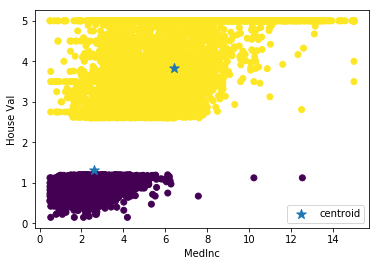

In [22]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, label=None)
plt.scatter(centroids[:,0], centroids[:,1], marker="*", s=[100], label='centroid')
plt.xlabel('MedInc')
plt.ylabel('House Val')
plt.legend(loc='best')
plt.show()

In [23]:
pd.crosstab(y, y_pred, colnames=["Pred"])

Pred,0,1
bin_house_val,,
0,17,5173
1,4079,1298


In [24]:
y_pred = pd.DataFrame(y_pred).replace({0:1,1:0}).values
y_pred = y_pred.ravel()

In [25]:
pd.crosstab(y, y_pred, colnames=["Pred"])

Pred,0,1
bin_house_val,,
0,5173,17
1,1298,4079


In [26]:
metrics.accuracy_score(y, y_pred)

0.8755559761521718

# GMM

In [27]:
from sklearn.mixture import GaussianMixture

In [29]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_pred = gmm.predict(X)
pd.crosstab(y,y_pred)

col_0,0,1
bin_house_val,,
0,5173,17
1,0,5377


In [30]:
metrics.accuracy_score(y, y_pred)

0.9983912179426516

# Linear Regression

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.iloc[:,0:1], X.iloc[:,1], test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_r = LinearRegression()

In [34]:
lin_r.fit(X_train, y_train)
y_pred = lin_r.predict(X_test)

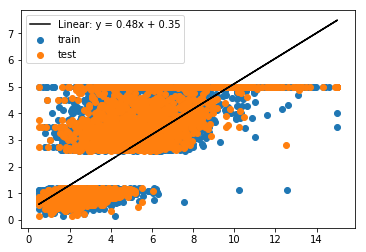

In [35]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_pred, c='k', label='Linear: y = {:.2f}x + {:.2f}'.format(lin_r.coef_[0], lin_r.intercept_))
plt.legend(loc='best')
plt.show()

In [36]:
metrics.r2_score(y_test, y_pred)

0.5448290019949722

# Preprocessing for ML models

In [16]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_val', 'bin_house_val'],
      dtype='object')

In [35]:
X, y = df.iloc[:,:-2], df['bin_house_val']

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression, DT, Random Forest, SVM, Naive Bayes, KNN

In [41]:
def train_evaluate(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [43]:
log_r = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [44]:
train_evaluate(log_r, X_train, y_train, X_test, y_test)

0.9526949541284404

In [45]:
train_evaluate(dt, X_train, y_train, X_test, y_test)

0.9346330275229358

In [46]:
train_evaluate(rf, X_train, y_train, X_test, y_test)

0.9641628440366973

In [47]:
train_evaluate(svc, X_train, y_train, X_test, y_test)

0.9595756880733946

In [48]:
train_evaluate(gnb, X_train, y_train, X_test, y_test)

0.8778669724770642

In [49]:
train_evaluate(knn, X_train, y_train, X_test, y_test)

0.9592889908256881

# Use tensorflow estimator LinearClassifier to fit model

In [11]:
import tensorflow as tf

In [40]:
X_train.shape

(7079, 8)

### sklearn StandardScaler does not work with tensorflow. Need to manually normalize

In [47]:
X_norm = X.apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [50]:
feature_cols = [tf.feature_column.numeric_column(key) for key in X.columns]

In [51]:
model = tf.estimator.LinearClassifier(feature_cols,optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmphcbn0xsx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2a778550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=100,shuffle=True)

In [53]:
model.train(input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmphcbn0xsx/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 321.435
INFO:tensorflow:loss = 1.5586296, step = 101 (0.311 sec)
INFO:tensorflow:global_step/sec: 478.7
INFO:tensorflow:loss = 2.1893368, step = 201 (0.209 sec)
INFO:tensorflow:global_step/sec: 504.722
INFO:tensorflow:loss = 3.2338054, step = 301 (0.199 sec)
INFO:tensorflow:global_step/sec: 481.145
INFO:tensorflow:loss = 1.2799573, step = 401 (0.207 sec)
INFO:tensorflow:global_step/sec: 497.33
INFO:tensorflow:loss = 2.848943, step = 501 (0.201 sec)
INFO:tensorflow:global_step/sec: 553.397
INFO:tensorflow:loss = 2.3184755, step = 601 (0.183 sec)
INFO:tensorflow:gl

In [54]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [55]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-21-02:58:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmphcbn0xsx/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-21-02:58:22
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9478211, accuracy_baseline = 0.51548165, auc = 0.9851012, auc_precision_recall = 0.98768514, average_loss = 0.1990053, global_step = 5000, label/mean = 0.51548165, loss = 1.9889126, precision = 0.9544432, prediction/mean = 0.5091721, recall = 0.9438265
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmphcbn0xsx/model.ckpt-5000


{'accuracy': 0.9478211,
 'accuracy_baseline': 0.51548165,
 'auc': 0.9851012,
 'auc_precision_recall': 0.98768514,
 'average_loss': 0.1990053,
 'label/mean': 0.51548165,
 'loss': 1.9889126,
 'precision': 0.9544432,
 'prediction/mean': 0.5091721,
 'recall': 0.9438265,
 'global_step': 5000}

# Use tensorflow estimator DNNClassifier to fit model

In [56]:
model = tf.estimator.DNNClassifier([10,10,10], feature_cols,optimizer='Adam',dropout=0.2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpzg7mts7j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2b1b6e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
model.train(input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpzg7mts7j/model.ckpt.
INFO:tensorflow:loss = 6.7945557, step = 1
INFO:tensorflow:global_step/sec: 277.176
INFO:tensorflow:loss = 11.228728, step = 101 (0.361 sec)
INFO:tensorflow:global_step/sec: 474.913
INFO:tensorflow:loss = 2.3610601, step = 201 (0.213 sec)
INFO:tensorflow:global_step/sec: 475.902
INFO:tensorflow:loss = 2.9420772, step = 301 (0.208 sec)
INFO:tensorflow:global_step/sec: 488.723
INFO:tensorflow:loss = 2.6312308, step = 401 (0.203 sec)
INFO:tensorflow:global_step/sec: 471.934
INFO:tensorflow:loss = 4.2600203, step = 501 (0.215 sec)
INFO:tensorflow:global_step/sec: 414.166
INFO:tensorflow:loss = 3.9228406, step = 601 (0.238 sec)
INFO:tensorfl

In [58]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-21-03:04:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpzg7mts7j/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-21-03:04:05
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9329128, accuracy_baseline = 0.51548165, auc = 0.98120594, auc_precision_recall = 0.9842026, average_loss = 0.21011803, global_step = 5000, label/mean = 0.51548165, loss = 2.099976, precision = 0.97451454, prediction/mean = 0.49383786, recall = 0.8932147
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpzg7mts7j/model.ckpt-5000


{'accuracy': 0.9329128,
 'accuracy_baseline': 0.51548165,
 'auc': 0.98120594,
 'auc_precision_recall': 0.9842026,
 'average_loss': 0.21011803,
 'label/mean': 0.51548165,
 'loss': 2.099976,
 'precision': 0.97451454,
 'prediction/mean': 0.49383786,
 'recall': 0.8932147,
 'global_step': 5000}